<a href="https://colab.research.google.com/github/tawadesharad/Tag-Prediction-NLP/blob/main/Tag_Prediction_Lawnics_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚖ Idenitifying the tags for a legal text document. 
## 1. Problem defination
Create a solution that automatically generate tags for the Test_docs legal text document. 
## 2. Data
The train data contains a total of 80 different samples which are catagorised into 1322 unique tags. The test data has 101 samples to be catagorised.
## 3. Evaluation
  1. Precision
  2. Recall
  3. F1 score

## 4. Features
Some features of the data.
1. There are 1322 unique labels (tags)
2. There are total of 80 sets in training data
3. This is a multilabel classification
 


## Getting Worspace ready

## Getting Data Ready


### Precprocessing the tags

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the data
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


tag_list = []
file_list = []
file_dir = "/content/drive/MyDrive/Colab Notebooks/Lawnic Assignment/Train_tags"

for tags in os.listdir(file_dir):
  file_list.append(tags)

def sorting(directory):
  if str(directory[5]) == '.':
    num = int(str(directory[4]))
    return num

  else:
    num1 = int(str(directory[4]))
    num2 = int(str(directory[5]))
    return num1*100 + num2



file_list = sorted(file_list, key=sorting )

for txt in file_list:  
  file = open(file_dir + '/' + txt, 'r')
  content = file.read()
  content = content.split(',')
  tag_list.append(content)
len(tag_list)
  

80

In [3]:
#converting the tags into numpy array
tag_list = np.array(tag_list)
tag_list[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


array([list(['Absence', ' Access', ' Accident', ' Account', ' Acquisition', ' Acquisition Proceeding', ' Act', ' Additional Advocate General', ' Advocate General', ' Agrarian Reform', ' Amendment', ' Amendment Act', ' Amount of Compensation', ' Amount Of Compensation Awarded', ' Appeal', ' Award', ' Awarded Compensation', ' Bench', ' Benefit', ' Cap', ' Case', ' Citizen', ' Civil Appeal', ' Claim', ' Claimant', ' Collector', ' Commercial', ' Compensation', ' Compensation For', ' Competent Court', ' Concentration', ' Consideration', ' Contrary', ' Court Fee', ' Date', ' Decision', ' Deficit Court Fee', ' Deposit', ' Development', ' Dispute', ' Distribution', ' District Judge', ' Division', ' Division Bench', ' Due', ' Duty', ' Duty of the Court', ' Equitable', ' Equitable Distribution', ' Executing Court', ' Factor', ' Fee', ' Fixation', ' Government', ' Grant', ' Granting', ' Holder', ' Illegal', ' India', ' Information', ' Issue', ' Judgment', ' Land', ' Land Acquisition', ' Legal', '

In [4]:
#getting all the tags present
all_tags = []
for elem in tag_list:
  for tag in elem:
    all_tags.append(tag)
len(all_tags)

2225

In [5]:
#finding all the unique tags
unique_tags, counts = np.unique(all_tags, return_counts=True)
len(unique_tags)


1322

### Visualising the labels

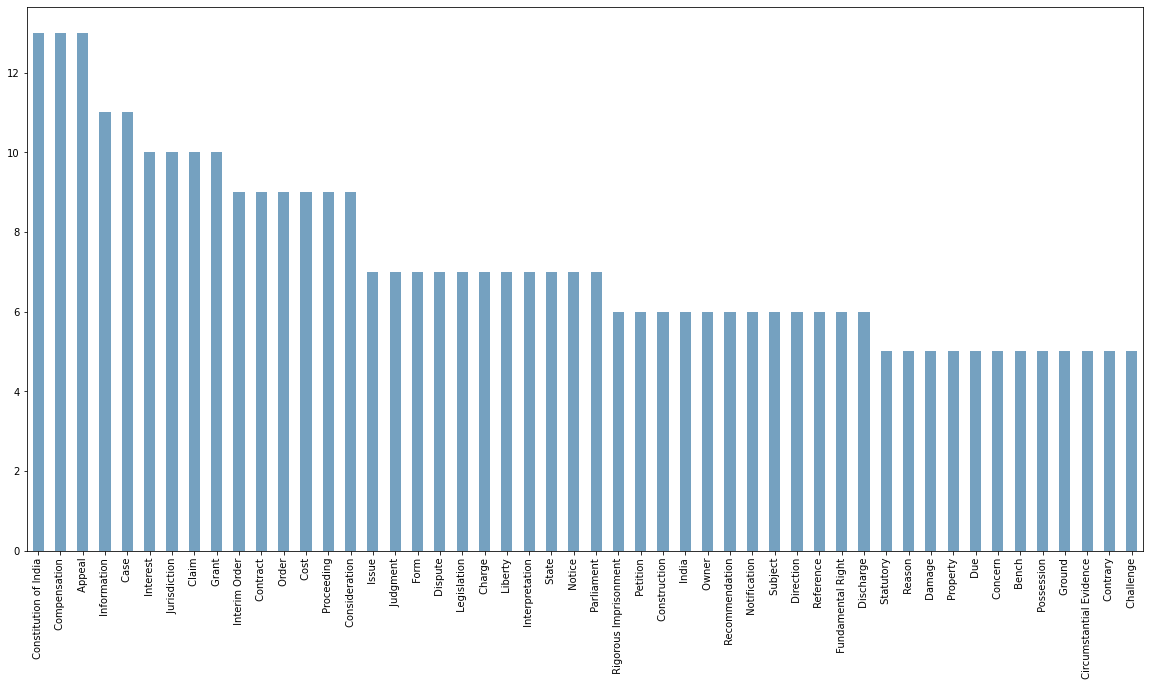

In [6]:
#Visialising the tags
value_tags = pd.Series(all_tags)
value_tags.value_counts()[:50].plot( figsize=(20,10), kind='bar',color ="#75a1c0",)

#### On an averge each tag appears ~2 times over the course of 80 samples

In [7]:
#On an average each tag appears 1.6 times
value_tags.value_counts().mean()

1.6830559757942511

### Preprocessing the training data

In [8]:
#Reading the file contents of Training Data
train_dir = '/content/drive/MyDrive/Colab Notebooks/Lawnic Assignment/Train_docs'

file_list_content = []
content_list = []

for content in os.listdir(train_dir):
  if str(content) == '.ipynb_checkpoints':
    continue
  file_list_content.append(content)

def sorting(directory):
  if str(directory[6]) == '_':
    num = int(str(directory[5]))
    return num

  else:
    num1 = int(str(directory[5]))
    num2 = int(str(directory[6]))
    return num1*10 + num2
 

#Sort the names
file_list_content = sorted(file_list_content, key= sorting)

for txt in file_list_content:  
  file = open(train_dir + '/' + txt, 'rb')
  content = file.read()
  content_list.append(content.decode('latin-1'))
file_list_content

['case_0_statement.txt',
 'case_1_statement.txt',
 'case_2_statement.txt',
 'case_3_statement.txt',
 'case_4_statement.txt',
 'case_5_statement.txt',
 'case_6_statement.txt',
 'case_7_statement.txt',
 'case_8_statement.txt',
 'case_9_statement.txt',
 'case_10_statement.txt',
 'case_11_statement.txt',
 'case_12_statement.txt',
 'case_13_statement.txt',
 'case_14_statement.txt',
 'case_15_statement.txt',
 'case_16_statement.txt',
 'case_17_statement.txt',
 'case_18_statement.txt',
 'case_19_statement.txt',
 'case_20_statement.txt',
 'case_21_statement.txt',
 'case_22_statement.txt',
 'case_23_statement.txt',
 'case_24_statement.txt',
 'case_25_statement.txt',
 'case_26_statement.txt',
 'case_27_statement.txt',
 'case_28_statement.txt',
 'case_29_statement.txt',
 'case_30_statement.txt',
 'case_31_statement.txt',
 'case_32_statement.txt',
 'case_33_statement.txt',
 'case_34_statement.txt',
 'case_35_statement.txt',
 'case_36_statement.txt',
 'case_37_statement.txt',
 'case_38_statement.tx

In [9]:
#Creating the data set
trainData = {"content": content_list, "labels": tag_list}
train_data = pd.DataFrame(trainData, columns=["content", "labels"])
train_data

,content,labels
0,"\r\n\r\nKurian Joseph, J.\r\n\r\n1. Leave gran...","[Absence, Access, Accident, Account, Acqui..."
1,"\r\n\r\nAbhay Manohar Sapre, J.\r\n\r\n1. Dela...",[Cause of Action]
2,"\r\n\r\nPinaki Chandra Ghose, J.\r\n\r\n1. Thi...","[Abetment, Abetment of Suicide, Absconding, ..."
3,\r\n\r\n1. This matter is placed before us as ...,"[Decision, Exemption, Exemption Notification..."
4,\r\n\r\n1. We have heard learned Counsel for t...,"[Child Labour, Compensation, Fundamental Rig..."
...,...,...
75,\r\n\r\n1. This is tenant's appeal by special ...,"[Absence, Appeal, Appellate Court, Bona Fid..."
76,"\r\n\r\nS.B. Sinha, J.\r\n\r\n1. The primal qu...","[Administration of Justice, Admiralty Jurisdi..."
77,"\r\n\r\nR. Banumathi, J.\r\n\r\n1. Leave grant...","[Absorption, Ad]"
78,"\r\n\r\nDipak Misra, J.\r\n\r\n1. Despite comp...","[Appreciation of Evidence, Assault, Autopsy,..."


### Processing Test data

In [10]:
#Reading the file contents of Training Data
test_dir = '/content/drive/MyDrive/Colab Notebooks/Lawnic Assignment/Test_docs'

file_test_content = []
test_content_list = []

for content in os.listdir(test_dir):
  if str(content) == '.ipynb_checkpoints':
    continue
  file_test_content.append(content)

def sorting_test(directory):
  
  
    num1 = int(str(directory[5]))
    num2 = int(str(directory[6]))
    num3 = int(str(directory[7]))

    return num1*100 + num2*10 + num3




#Sort the names
file_test_content = sorted(file_test_content, key= sorting_test)

for txt in file_test_content:  
  file = open(test_dir + '/' + txt, 'rb')
  content = file.read()
  test_content_list.append(content.decode('latin-1'))
test_content_list[0]

'\r\n\r\nP. Venkatarama Reddi, J.\r\n\r\n1. The opinion recorded by the Kerala High Court in ITR No. 16 of 1997 has given rise to this appeal filed by the Chief Commissioner of Income-tax. The dispute relates to the assessment year 1985-86. At the instance of the Revenue the following question was referred under Section 256(1) of the Income tax Act for the opinion of the High Court:\r\n\r\n"Whether on the facts and in the circumstances of the case, the Tribunal is right in law and fact in holding that Rs. 3,02,758/- cannot be brought to tax and in doleting the addition of Rs. 3,02,758/- sustained by CIT (Appeals)?"\r\n\r\nThe High Court accepted the view of the Tribunal which partly allowed the appeal of the assessee and answered the question in favour of the assessee.\r\n\r\n2. The facts in brief are: The respondent-assessee is engaged in the business of tea, spices etc. During the assessment year 1985-86 (previous year ending on 31.3.1985) the assessee \'wrote-back\' in its accounts 

In [11]:
#Creating the data set
testData = {"content": test_content_list}
test_data = pd.DataFrame(testData, columns=["content"])
test_data.head()

,content
0,"\r\n\r\nP. Venkatarama Reddi, J.\r\n\r\n1. The..."
1,"\r\n\r\nG.B. Pattanaik, J.\r\n\r\n1. This batc..."
2,\r\n\r\n1. After hearing the Learned Counsel f...
3,\r\n\r\n1. This appeal is directed against the...
4,\r\n\r\n1. An issue raised by the appellants w...


### Preprocessing Text Data
pre-processing steps are common for most of the NLP tasks (feature extraction for Machine learning models):

In [12]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [13]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Lemmanization
wordnet_lemmatizer = WordNetLemmatizer()
#Stemming
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def tokenize_lemma_stopwords(text):

    #removing the escape sequences
    text = text.replace("\n", " ")
    text = text.replace("\r", " ")

    # split string into words (tokens)
    tokens = word_tokenize(text.lower())

    # keep strings with only alphabets
    tokens = [t for t in tokens if t.isalpha()]

    # put words into base form
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] 
    tokens = [stemmer.stem(t) for t in tokens]

    # remove short words, they're probably not useful
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords

    #removing the names

    tokens = tokens[2:]
    cleanedText = " ".join(tokens)
    return cleanedText

def dataCleaning(df):
    data = df.copy()
    data["content"] = data["content"].apply(tokenize_lemma_stopwords)
    return data

clean_train_data = dataCleaning(train_data)
clean_test_data = dataCleaning(test_data)


clean_train_data

,content,labels
0,leav grant special leav petit civil around acr...,"[Absence, Access, Accident, Account, Acqui..."
1,sapr delay file special leav petit condon leav...,[Cause of Action]
2,ghose thi crimin appeal special leav direct im...,"[Abetment, Abetment of Suicide, Absconding, ..."
3,place befor bench thi court differ view expres...,"[Decision, Exemption, Exemption Notification..."
4,counsel parti prayer made thi writ petit follo...,"[Child Labour, Compensation, Fundamental Rig..."
...,...,...
75,appeal special leav though appeal three number...,"[Absence, Appeal, Appellate Court, Bona Fid..."
76,question involv thi batch appeal writ petit co...,"[Administration of Justice, Admiralty Jurisdi..."
77,grant thi appeal special leav aris order date ...,"[Absorption, Ad]"
78,despit complet decad date solemnis marriag spi...,"[Appreciation of Evidence, Assault, Autopsy,..."


## Data Embedding / Vectorization
Here i have choosed IF-DF feature extraction

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
df3 = pd.concat([clean_train_data["content"], clean_test_data["content"]])
df3 = pd.DataFrame(df3)
vectorized_data = vectorizer.fit_transform(df3["content"])
vectorized_train_data = vectorized_data[:80]
vectorized_test_data  = vectorized_data[80:]
vectorized_test_data.shape, vectorized_train_data.shape

((101, 10170), (80, 10170))

## Frequency distribution of words(tokens) after pre-processing.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


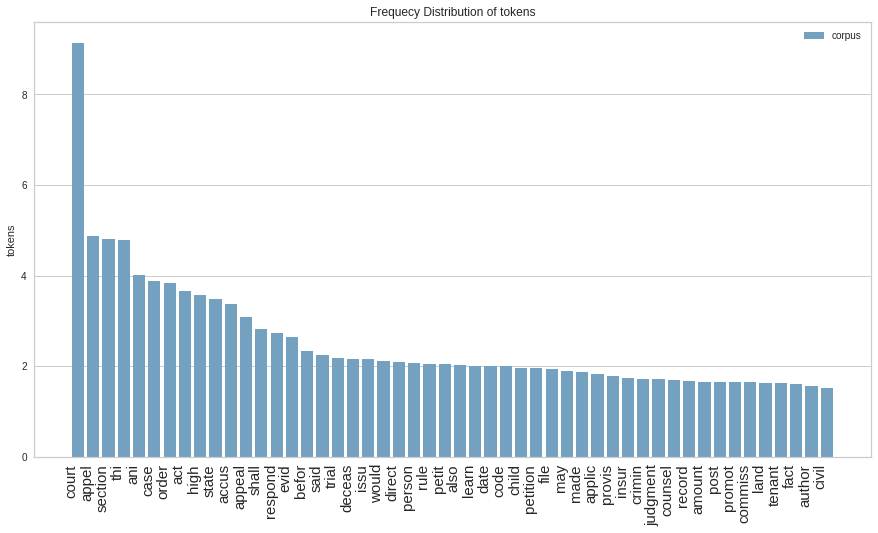

In [15]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
fig, axes = plt.subplots(figsize=(15,8))
axes.set_ylabel('tokens')
axes.set_title('Frequecy Distribution of tokens')
axes.set_xticklabels(features, fontdict={'fontsize': 15})
visualizer = FreqDistVisualizer(features =features, orient='v', ax= axes,color="#75a1c0")
visualizer.fit(vectorized_train_data)
plt.legend();

### Vectorizing the labels using `MultiLabelBinarizer`

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_labels = mlb.fit_transform(tag_list)


In [17]:

temp_df = pd.DataFrame(data=train_labels, columns= unique_tags)
temp_df.insert(loc=0, column='content', value=clean_train_data['content'])
temp_df.head()

,content,Abetment of Suicide,Absconding,Access,Accident,Accidental Death,Accommodation,Account,Account Book,Accounts,Accusation,Accused,Acquisition,Acquisition Proceeding,Act,Ad,Additional Advocate General,Additional Evidence,Adjournment,Adjudicating Authority,Adjudication,Adjudication Proceeding,Adjustment,Administration,Administration of Justice,Administrative,Administrative Authority,Administrative Power,Admiralty Jurisdiction,Adoption,Adoptive Parent,Advance Licence,Adverse Entry,Advertisement,Advocate General,Against Any Liability,Age,Agency,Agent,Agrarian Reform,...,Act,Act of Omission,Acting Chief Justice,Actionable Claim,Ad,Adjudication,Administration of Justice,Administrative,Administrative Action,Admission,Advocate General,Affirmation,Agreement,Allotment,Aluminium,Amendment,Amicus Curiae,Annual Letting Value,Appeal,Appealable Order,Application,Appointment,Appreciation of Evidence,Appropriation,Assault,Attesting Witness,Bank,Baseless,Benefit of Doubt,Cause of Action,Child Labour,Civil Appeal,Coastal Zone,Conclusive Proof,Constitution of India,Constitutional Validity,Contempt of Court,Daily Wage,Decision,Promotion
0,leav grant special leav petit civil around acr...,0,0,1,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,sapr delay file special leav petit condon leav...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,ghose thi crimin appeal special leav direct im...,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,place befor bench thi court differ view expres...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,counsel parti prayer made thi writ petit follo...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Modelling

### Creating a evaluation function

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
eval = {}

def eval_scores(model_name, test_labels, y_preds):
  
  #Considering the micro average F1 score as there in inequal distribution

  precision = precision_score( test_labels, y_preds, average='micro')
  recall = recall_score(test_labels, y_preds, average='micro' )
  f1 = f1_score(test_labels, y_preds, average= 'micro')
  eval = {'Model Name': model_name,
          'Precision': precision,
          'Recall Scores': recall,
          'F1 Scores': f1
          }
  return eval



In [19]:
from sklearn.model_selection import train_test_split
x = vectorized_train_data
y = train_labels
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2, random_state=42,shuffle=True)
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Using OneVsRest (Data Transformation)

`LinearSVC`


In [ ]:
test_data.drop('content', axis = 1,inplace=True)
test_data.to_csv('test_tags.csv') 
test_data

,filename,Tags
0,case_100_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
1,case_101_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
2,case_102_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
3,case_103_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
4,case_104_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
...,...,...
96,case_196_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
97,case_197_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
98,case_198_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
99,case_199_statement.txt,"[[ Absconding, Access, Accounts, Accusation..."
